In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
def calculate_psnr(original, filtered):
    original = original.astype(np.float32)
    filtered = filtered.astype(np.float32)
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

In [4]:
img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

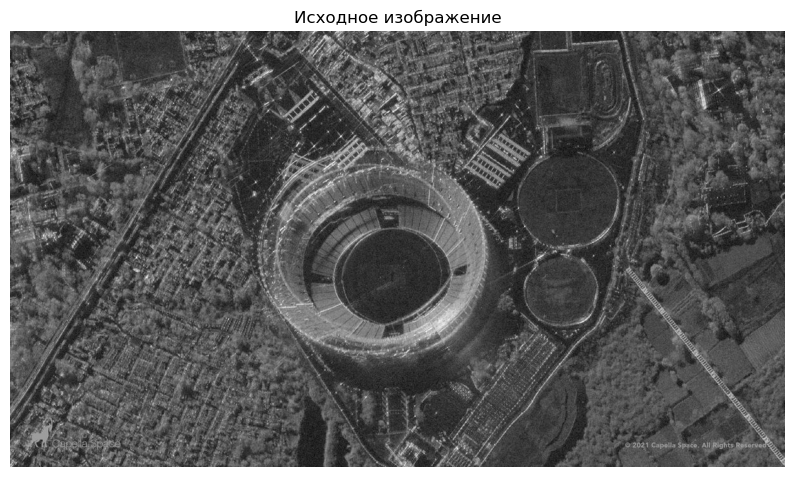

In [5]:
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

In [10]:
# 1. Зашумить изображение
# Гауссов шум
sigma = 2

noise_gauss = np.random.normal(0.0, sigma, img.shape).astype(np.float32)

img_gauss_noisy = img.astype(np.float32) + noise_gauss
img_gauss_noisy = np.clip(img_gauss_noisy, 0, 255).astype(np.uint8)

print(f'Гауссов шум: mean = {noise_gauss.mean():.2f}, std = {noise_gauss.std():.2f}')

Гауссов шум: mean = 0.00, std = 2.00


In [11]:
# Постоянный шум
A = 25  
noise_uniform = np.random.uniform(-A, A, img.shape).astype(np.float32)

img_uniform_noisy = img.astype(np.float32) + noise_uniform
img_uniform_noisy = np.clip(img_uniform_noisy, 0, 255).astype(np.uint8)

print(
    f'Постоянный шум: mean = {noise_uniform.mean():.2f}, '
    f'min = {noise_uniform.min():.2f}, max = {noise_uniform.max():.2f}'
)

Постоянный шум: mean = -0.01, min = -25.00, max = 25.00


In [12]:
# Соль и перец
p = 0.02

sp_noise = img.copy()
rand = np.random.uniform(0, 1, img.shape)

sp_noise[rand < p] = 0         # "перец"
sp_noise[rand > 1 - p] = 255   # "соль"

print(f'Шум "соль и перец": доля испорченных пикселей ≈ {2 * p:.2%}')

Шум "соль и перец": доля испорченных пикселей ≈ 4.00%


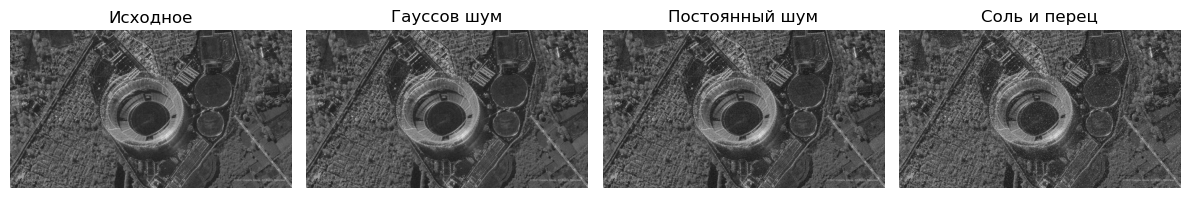

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_gauss_noisy, cmap='gray')
plt.title('Гауссов шум')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_uniform_noisy, cmap='gray')
plt.title('Постоянный шум')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sp_noise, cmap='gray')
plt.title('Соль и перец')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# 2. Тесты
# Фильтрация гауссового шума
# Медианный фильтр
img_gn_median3 = cv2.medianBlur(img_gauss_noisy, 3)
img_gn_median5 = cv2.medianBlur(img_gauss_noisy, 5)

# Фильтр Гаусса
img_gn_gauss3 = cv2.GaussianBlur(img_gauss_noisy, (3, 3), 0)
img_gn_gauss5 = cv2.GaussianBlur(img_gauss_noisy, (5, 5), 0)

# Билатеральный фильтр
img_gn_bilat = cv2.bilateralFilter(img_gauss_noisy, 9, 75, 75)

# Фильтр нелокальных средних
img_gn_nlm = cv2.fastNlMeansDenoising(img_gauss_noisy, None, 10, 7, 21)

In [16]:
# Фильтрация постоянного шума
# Медианный фильтр
img_un_median3 = cv2.medianBlur(img_uniform_noisy, 3)
img_un_median5 = cv2.medianBlur(img_uniform_noisy, 5)

# Фильтр Гаусса
img_un_gauss3 = cv2.GaussianBlur(img_uniform_noisy, (3, 3), 0)
img_un_gauss5 = cv2.GaussianBlur(img_uniform_noisy, (5, 5), 0)

# Билатеральный фильтр
img_un_bilat = cv2.bilateralFilter(img_uniform_noisy, 9, 75, 75)

# Фильтр нелокальных средних
img_un_nlm = cv2.fastNlMeansDenoising(img_uniform_noisy, None, 10, 7, 21)

In [17]:
# Фильтрация шума соль и перец
# Медианный фильтр
sp_median3 = cv2.medianBlur(sp_noise, 3)
sp_median5 = cv2.medianBlur(sp_noise, 5)

# Фильтр Гаусса
sp_gauss3 = cv2.GaussianBlur(sp_noise, (3, 3), 0)
sp_gauss5 = cv2.GaussianBlur(sp_noise, (5, 5), 0)

# Билатеральный фильтр
sp_bilat = cv2.bilateralFilter(sp_noise, 9, 75, 75)

# Фильтр нелокальных средних
sp_nlm = cv2.fastNlMeansDenoising(sp_noise, None, 10, 7, 21)

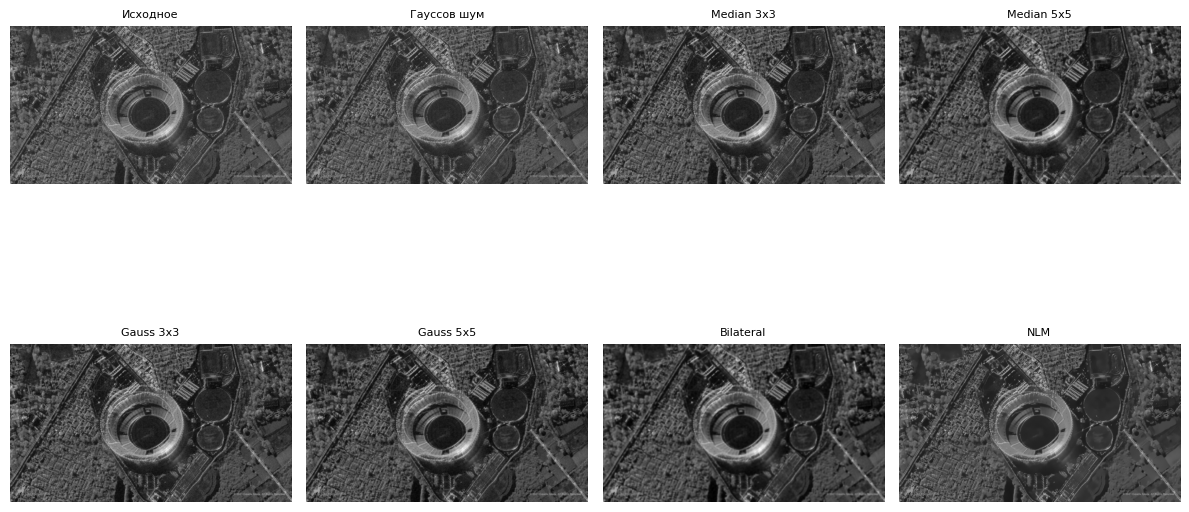

In [18]:
images_gn = [
    img, img_gauss_noisy,
    img_gn_median3, img_gn_median5,
    img_gn_gauss3, img_gn_gauss5,
    img_gn_bilat, img_gn_nlm
]

titles_gn = [
    'Исходное', 'Гауссов шум',
    'Median 3x3', 'Median 5x5',
    'Gauss 3x3', 'Gauss 5x5',
    'Bilateral', 'NLM'
]

plt.figure(figsize=(12, 8))
for i in range(len(images_gn)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images_gn[i], cmap='gray')
    plt.title(titles_gn[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

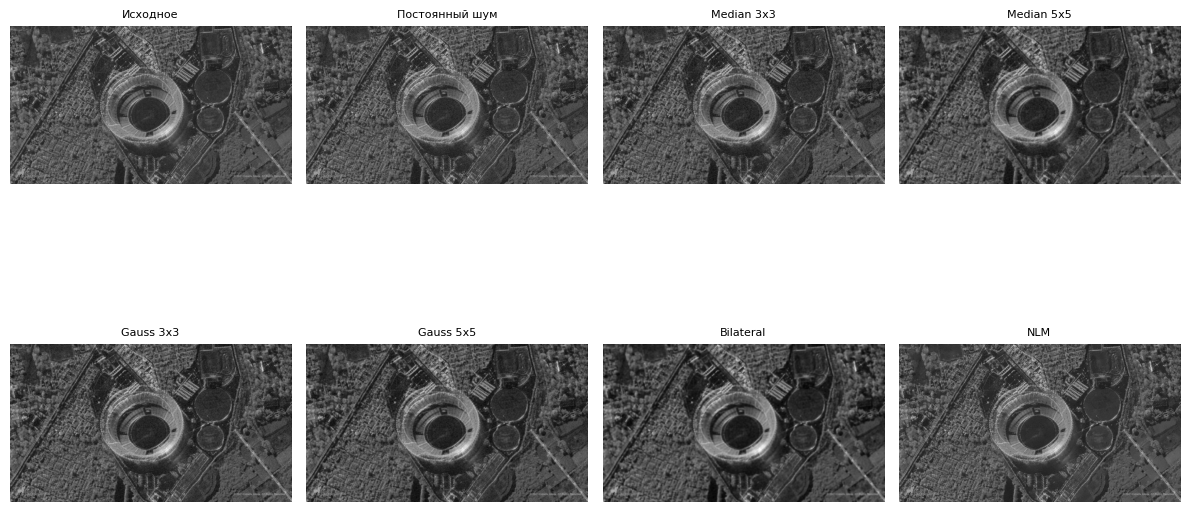

In [19]:
images_un = [
    img, img_uniform_noisy,
    img_un_median3, img_un_median5,
    img_un_gauss3, img_un_gauss5,
    img_un_bilat, img_un_nlm
]

titles_un = [
    'Исходное', 'Постоянный шум',
    'Median 3x3', 'Median 5x5',
    'Gauss 3x3', 'Gauss 5x5',
    'Bilateral', 'NLM'
]

plt.figure(figsize=(12, 8))
for i in range(len(images_un)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images_un[i], cmap='gray')
    plt.title(titles_un[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

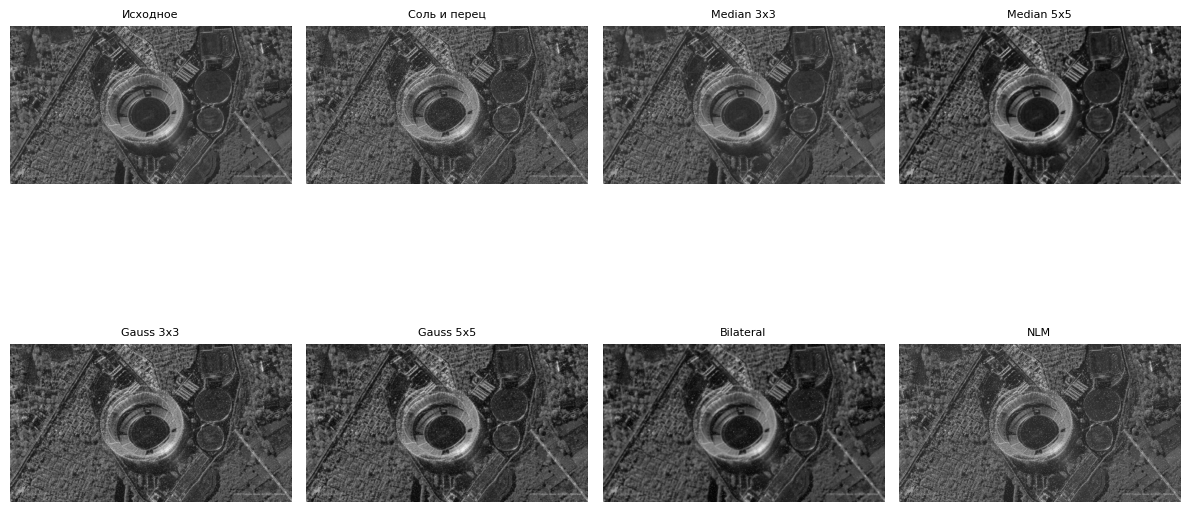

In [20]:
images_sp = [
    img, sp_noise,
    sp_median3, sp_median5,
    sp_gauss3, sp_gauss5,
    sp_bilat, sp_nlm
]

titles_sp = [
    'Исходное', 'Соль и перец',
    'Median 3x3', 'Median 5x5',
    'Gauss 3x3', 'Gauss 5x5',
    'Bilateral', 'NLM'
]

plt.figure(figsize=(12, 8))
for i in range(len(images_sp)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images_sp[i], cmap='gray')
    plt.title(titles_sp[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# 4. Лучший фильтр
# PSNR для гауссового шума

psnr_gauss = {}

psnr_gauss['Median 3x3 (Gauss noise)'] = calculate_psnr(img, img_gn_median3)
psnr_gauss['Median 5x5 (Gauss noise)'] = calculate_psnr(img, img_gn_median5)
psnr_gauss['Gauss 3x3 (Gauss noise)']  = calculate_psnr(img, img_gn_gauss3)
psnr_gauss['Gauss 5x5 (Gauss noise)']  = calculate_psnr(img, img_gn_gauss5)
psnr_gauss['Bilateral (Gauss noise)']  = calculate_psnr(img, img_gn_bilat)
psnr_gauss['NLM (Gauss noise)']        = calculate_psnr(img, img_gn_nlm)

print('PSNR для ГАУССОВОГО шума:')
for name, value in psnr_gauss.items():
    print(f'{name:30s}: {value:.2f} dB')

best_gauss_name = max(psnr_gauss, key=psnr_gauss.get)
print(f'\nЛучший фильтр для гауссового шума: {best_gauss_name} '
      f'({psnr_gauss[best_gauss_name]:.2f} dB)')

PSNR для ГАУССОВОГО шума:
Median 3x3 (Gauss noise)      : 28.34 dB
Median 5x5 (Gauss noise)      : 25.23 dB
Gauss 3x3 (Gauss noise)       : 30.06 dB
Gauss 5x5 (Gauss noise)       : 27.70 dB
Bilateral (Gauss noise)       : 24.95 dB
NLM (Gauss noise)             : 31.60 dB

Лучший фильтр для гауссового шума: NLM (Gauss noise) (31.60 dB)


In [22]:
psnr_uniform = {}

psnr_uniform['Median 3x3 (Const noise)'] = calculate_psnr(img, img_un_median3)
psnr_uniform['Median 5x5 (Const noise)'] = calculate_psnr(img, img_un_median5)
psnr_uniform['Gauss 3x3 (Const noise)']  = calculate_psnr(img, img_un_gauss3)
psnr_uniform['Gauss 5x5 (Const noise)']  = calculate_psnr(img, img_un_gauss5)
psnr_uniform['Bilateral (Const noise)']  = calculate_psnr(img, img_un_bilat)
psnr_uniform['NLM (Const noise)']        = calculate_psnr(img, img_un_nlm)

print('PSNR для ПОСТОЯННОГО шума:')
for name, value in psnr_uniform.items():
    print(f'{name:30s}: {value:.2f} dB')

best_uniform_name = max(psnr_uniform, key=psnr_uniform.get)
print(f'\nЛучший фильтр для постоянного шума: {best_uniform_name} '
      f'({psnr_uniform[best_uniform_name]:.2f} dB)')

PSNR для ПОСТОЯННОГО шума:
Median 3x3 (Const noise)      : 26.43 dB
Median 5x5 (Const noise)      : 24.77 dB
Gauss 3x3 (Const noise)       : 28.45 dB
Gauss 5x5 (Const noise)       : 27.13 dB
Bilateral (Const noise)       : 25.09 dB
NLM (Const noise)             : 26.22 dB

Лучший фильтр для постоянного шума: Gauss 3x3 (Const noise) (28.45 dB)


In [23]:
psnr_sp = {}

psnr_sp['Median 3x3 (SP noise)'] = calculate_psnr(img, sp_median3)
psnr_sp['Median 5x5 (SP noise)'] = calculate_psnr(img, sp_median5)
psnr_sp['Gauss 3x3 (SP noise)']  = calculate_psnr(img, sp_gauss3)
psnr_sp['Gauss 5x5 (SP noise)']  = calculate_psnr(img, sp_gauss5)
psnr_sp['Bilateral (SP noise)']  = calculate_psnr(img, sp_bilat)
psnr_sp['NLM (SP noise)']        = calculate_psnr(img, sp_nlm)

print('PSNR для шума "соль и перец":')
for name, value in psnr_sp.items():
    print(f'{name:30s}: {value:.2f} dB')

best_sp_name = max(psnr_sp, key=psnr_sp.get)
print(f'\nЛучший фильтр для шума "соль и перец": {best_sp_name} '
      f'({psnr_sp[best_sp_name]:.2f} dB)')

PSNR для шума "соль и перец":
Median 3x3 (SP noise)         : 28.21 dB
Median 5x5 (SP noise)         : 25.23 dB
Gauss 3x3 (SP noise)          : 25.52 dB
Gauss 5x5 (SP noise)          : 25.62 dB
Bilateral (SP noise)          : 22.56 dB
NLM (SP noise)                : 19.20 dB

Лучший фильтр для шума "соль и перец": Median 3x3 (SP noise) (28.21 dB)
